<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>


# CVG-2020  Assigment-2

## Question1 : Linear Regression

## In this problem, we will implement least squares linear regression to predict density of wine based on its acidity. Recall that the error metric for least squares is given by

# 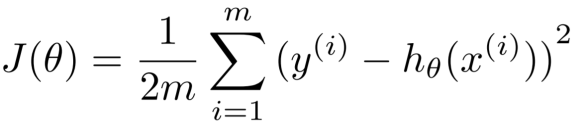

In [1]:
import numpy as np
import LinearRegression_GD as LR
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
X_train=pd.read_csv("/home/raj_pawar/cvg/cvg_assignment2/CVG_Assignment_2_ML_Regression/linearX.csv",header=None,skiprows=None)
X_train=np.array(X_train)


Y_train=pd.read_csv("/home/raj_pawar/cvg/cvg_assignment2/CVG_Assignment_2_ML_Regression/linearY.csv",header=None,skiprows=None)
Y_train=np.array(Y_train)

# (a) Implement batch gradient descent method for optimizing J(θ). Choose an appropriate learning rate and the stopping criteria (as a function of the change in the value of J(θ)). You can initialize the parameters as θ = V(0) (the vector of all zeros). Do not forget to include the intercept term. Report your learning rate, stopping criteria and the final set of parameters obtained by your algorithm.

In [7]:

learning_rates=[0.1,0.25,0.8]

reg=LR.LinearRegression(1,num_iter=2000,adp_lr=False,ep=1e-10)
x_train,y_train,x_test,y_test=reg.train_test_split(X_train,Y_train,test_size=0.2,shuffle=True,random_seed=2)
x_train=np.array(x_train)
y_train=np.array(y_train)
x_test=np.array(x_test)
y_test=np.array(y_test)
x_train= reg.Normalize(x_train)

In [4]:
p0=[]
p1=[]
loss=[]
for lr in learning_rates:
    print("")

    model=LR.LinearRegression(lr=lr,num_iter=2000,adp_lr=False,ep=1e-10)

    theta = model.initialize_with_zeros()
    
    theta ,J,t0,t1= model.gradientDescent(x_train,y_train,theta,theta)
    
    print("")
    p0.append(theta[0])
    p1.append(theta[1])
    loss.append(J[-1])
    print("with Learning rate= {} the parameters obtained are:".format(lr))
    print("slope( theta1) =",theta[1])
    print("intercept(theta0) =",theta[0])



7.92136937499998e-06
after 0 iterations, loss = 6.772512441754986e-06
after 100 iterations, loss = 1.8152890334612303e-06
after 200 iterations, loss = 1.563282231286139e-06
after 300 iterations, loss = 1.4135805970553332e-06
after 400 iterations, loss = 1.324652127003718e-06
after 500 iterations, loss = 1.2718252301808825e-06
after 600 iterations, loss = 1.2404440422856056e-06
after 700 iterations, loss = 1.2218024219568017e-06
after 800 iterations, loss = 1.2107285897729378e-06
after 900 iterations, loss = 1.204150311861823e-06
after 1000 iterations, loss = 1.2002425643397726e-06
after 1100 iterations, loss = 1.1979212135391157e-06
after 1200 iterations, loss = 1.1965422427869457e-06
after 1300 iterations, loss = 1.1957230816611063e-06
after 1400 iterations, loss = 1.1952364687659274e-06
after 1500 iterations, loss = 1.1949474021802558e-06
after 1600 iterations, loss = 1.194775685623262e-06
convergence criteria at met 1653 iteration ...STOP training

with Learning rate= 0.1 the param

In [5]:
accuracy=100-np.mean(np.abs(model.h(x_train,theta)-y_train)*100)
print("train_accurracy =",accuracy)

accuracy=100-np.mean(np.abs(model.h(x_test,theta)-y_test)*100)
print("test_accurracy =",accuracy)

train_accurracy = 99.8872563140267
test_accurracy = 93.50419658147896


# (b) Implement the same as discussed in (a) with adaptive learning rate. In this case, you are supposed to set learning rate η = η’/( √t), where t is the iteration number. Report your initial learning rate, stopping criteria and the final set of parameters obtained by your algorithm. How does it vary from part (a)? Comment on the results obtained.

In [25]:
lr_list=[3,2,1]
p0_=[]
p1_=[]
for lr in lr_list:
    print("")
 
    model_ = LR.LinearRegression(lr=lr,num_iter=2000,adp_lr=True,ep=1e-12)

    theta_ = model_.initialize_with_zeros()
    
    theta_ ,J_,t0_,t1_= model_.gradientDescent(x_train,y_train,theta_,theta_)
    
    p0_.append(theta_[0])
    p1_.append(theta_[1])
    print("")
    print("with Learning rate= {} the parameters obtained are:".format(lr))
    print("slope( theta1) =",theta_[1])
    print("intercept(theta0) =",theta_[0])




7.92136937499998e-06
after 0 iterations, loss = 2.934155709892469e-05
after 100 iterations, loss = 1.2495767992351366e-06
after 200 iterations, loss = 1.2096776470065058e-06
after 300 iterations, loss = 1.200147429138159e-06
after 400 iterations, loss = 1.196961266337964e-06
after 500 iterations, loss = 1.195690742559809e-06
after 600 iterations, loss = 1.1951234790711441e-06
after 700 iterations, loss = 1.1948490314353257e-06
after 800 iterations, loss = 1.1947079319587975e-06
convergence criteria at met 803 iteration ...STOP training

with Learning rate= 3 the parameters obtained are:
slope( theta1) = 0.007783834488665879
intercept(theta0) = 0.9946368530192822

7.92136937499998e-06
after 0 iterations, loss = 9.35416217456548e-06
after 100 iterations, loss = 1.3427164956128587e-06
after 200 iterations, loss = 1.2572893210374282e-06
after 300 iterations, loss = 1.2269532139205584e-06
after 400 iterations, loss = 1.2131027366330022e-06
after 500 iterations, loss = 1.2058954141888918e-0

In [26]:
accuracy=100-np.mean(np.abs(model.h(x_train,theta)-y_train)*100)
print("train_accurracy =",accuracy)

accuracy=100-np.mean(np.abs(model.h(x_test,theta)-y_test)*100)
print("test_accurracy =",accuracy)


train_accurracy = 99.8872563140267
test_accurracy = 93.50419658147896


In [23]:

df = pd.DataFrame({"Learning Rate" : learning_rates,"Slope(theta1)": p1, "Intercept(theta0)" : p0,"Converged after iteration":[1653,730,254]})
df.head()

,Learning Rate,Slope(theta1),Intercept(theta0),Converged after iteration
0,0.10,0.007781,0.994638,1653
1,0.25,0.007824,0.994627,730
2,0.80,0.007857,0.994618,254


In [9]:
df = pd.DataFrame({"Learning Rate" : lr_list,"Slope(theta1)": p1_,"Intercept(theta0)":p0_,"Converged after iteration":[2000,1506,803]})
df.head()

,Learning Rate,Slope(theta1),Intercept(theta0),Converged after iteration
0,1,0.007017,0.994833,2000
1,2,0.007734,0.994650,1506
2,3,0.007784,0.994637,803


# (c) Plot the data on a two-dimensional graph and plot the hypothesis function learned by your algorithm in the previous part.

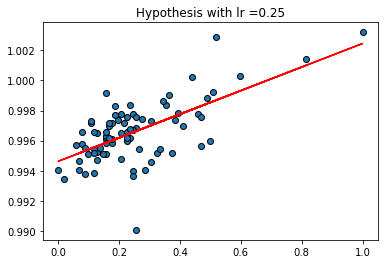

In [10]:
y1=p1[1]*x_train+p0[1]

plt.plot(x_train,y1,color='r')
plt.scatter(x_train,y_train,edgecolors='k')
plt.title("Hypothesis with lr ={}".format(learning_rates[1]))
plt.show()

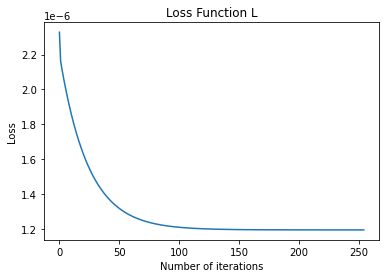

In [11]:
#Plot the loss function
plt.title('Loss Function L')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.plot(J)
plt.show()

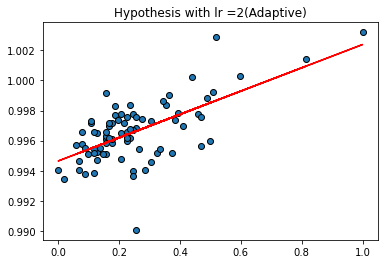

In [12]:
y1_=p1_[1]*x_train+p0_[1]

plt.plot(x_train,y1_,color='r')
plt.scatter(x_train,y_train,edgecolors='k')
plt.title("Hypothesis with lr ={}(Adaptive)".format(lr_list[1]))
plt.show()

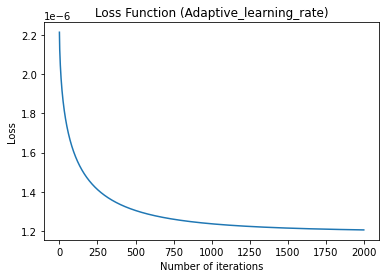

In [27]:
#Plot the loss function
plt.title('Loss Function (Adaptive_learning_rate)')
plt.xlabel('Number of iterations')
plt.ylabel('Loss')
plt.plot(J_)
plt.show()

# (d) Draw a 3-dimensional mesh showing the error function (J(θ)) on z-axis and the parameters in the x − y plane. Display the error value using the current set of parameters at each iteration of the gradient descent. Include a time gap of 0.2 seconds in your display for each iteration so that the change in the function value can be observed by the human eye.

# (e) Repeat the part above for drawing the contours of the error function at each iteration of the gradient descent. Once again, chose a time gap of 0.2 sec so that the change be perceived by the human eye (Note here plot will be 2-D).

# (f) Repeat the part above (i.e. draw the contours at each learning iteration) for the step size values of η = {0.001, 0.025, 0.1}. What do you observe? Comment.

In [2]:
model_plot=LR.Gradient_Descent()
theta_grid = theta0_grid = np.linspace(-200, 200, 100)
grid_theta, grid_theta0 = np.meshgrid(theta_grid, theta0_grid)

In [8]:
learning_rate = [0.001,0.025,0.1]

list_point1 = []
list_point2 = []
list_point3 = []

for i in range (0,3):
    thetap = 200
    theta0p = -200
    epsilon = 0.1
    loss_prev = 0
    while epsilon >= 0.0001:
        thetap,theta0p = model_plot.compute_gradient_descent(thetap,theta0p,x_train,y_train,learning_rate[i])
        loss = model_plot.loss_function(x_train,y_train,thetap,theta0p,model_plot.prediction_function)
        epsilon = np.abs(loss - loss_prev)
        loss_prev = loss 
        if i==0:
            list_point1.append((thetap,theta0p))
        if i==1:
            list_point2.append((thetap,theta0p))
        if i==2:
            list_point3.append((thetap,theta0p))

In [10]:
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

list_test1 = list_point1[::20]
list_test2= list_point2[::20]
list_test3 = list_point3[::20]

In [11]:
grid_z = []

for th0 in theta0_grid:
    row_list = []
    for th in theta_grid:
        row_list.append(model_plot.loss_function(x_train,y_train,th,th0,model_plot.prediction_function))
    grid_z.append(row_list)

print(len(grid_z))

100


In [12]:
x_data1 = []
y_data1 = []
z_data1 = []
x_data2 = []
y_data2 = []
z_data2 = []
x_data3 = []
y_data3 = []
z_data3 = []


test=[list_test1,list_test2,list_test3]
for i in range (0,3):
    for theta,theta0 in test[i]:
        if i==0:
            x_data1.append(theta)
            y_data1.append(theta0)
            z_data1.append(model_plot.loss_function(x_train,y_train,theta,theta0,model_plot.prediction_function))
        if i==1:
            x_data2.append(theta)
            y_data2.append(theta0)
            z_data2.append(model_plot.loss_function(x_train,y_train,theta,theta0,model_plot.prediction_function))
        if i==2:
            x_data3.append(theta)
            y_data3.append(theta0)
            z_data3.append(model_plot.loss_function(x_train,y_train,theta,theta0,model_plot.prediction_function))
print(min(z_data2)      )   

0.08452363374091909


<IPython.core.display.Javascript object>


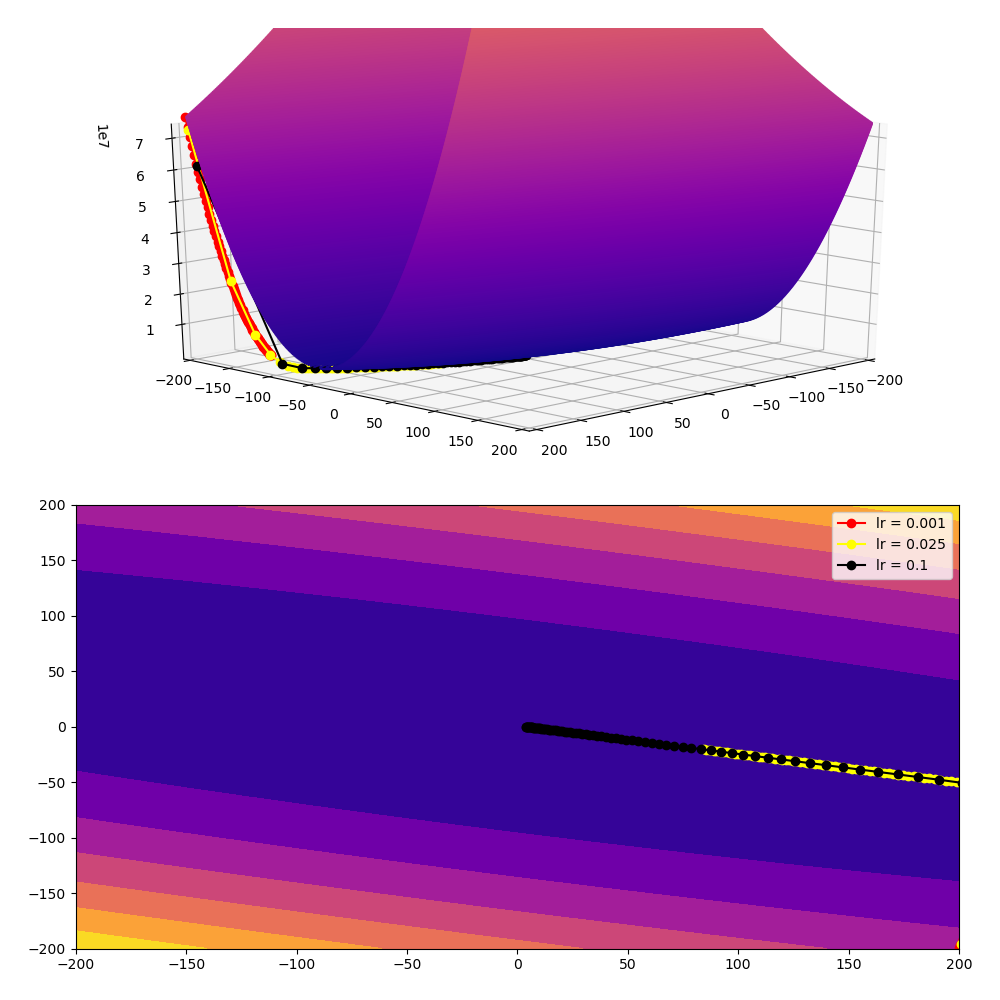

Locator attempting to generate 1026 ticks ([0.0, ..., 205000000.0]), which exceeds Locator.MAXTICKS (1000).
<ipython-input-18-4fad3e760232>:11: UserWarning: The following kwargs were not used by contour: 'theta'
  ax1.contour3D(grid_theta, grid_theta0, grid_z,1100,cmap='plasma',theta=0.1)


In [18]:
%matplotlib notebook
data1 = np.array([[x_data1,y_data1,z_data1]])

data2 = np.array([[x_data2,y_data2,z_data2]])

data3 = np.array([[x_data3,y_data3,z_data3]])

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2, 1, 1, projection='3d')

ax1.contour3D(grid_theta, grid_theta0, grid_z,1100,cmap='plasma',theta=0.1)
ax1.view_init(elev=20., azim=45)
lines1 = [ax1.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1],color="red")[0] for dat in data1]

lines2 = [ax1.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1],color="yellow")[0] for dat in data2]

lines3 = [ax1.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1],color="k")[0] for dat in data3]

ax1.set_xlim([-200,200])
ax1.set_ylim([-200,200])
ax1.set_zlim([min(z_data2),max(z_data2)])

ax2 = fig.add_subplot(2, 1, 2)
ax2.set_xlim([-200,200])
ax2.set_ylim([-200,200])

cp = ax2.contourf(theta_grid,theta0_grid,grid_z, cmap='plasma')
line2, = ax2.plot([],[],color='red',marker="o")
line3, = ax2.plot([],[],color='yellow',marker="o")
line4, = ax2.plot([],[],color='k',marker="o")

plt.legend(["lr = 0.001","lr = 0.025","lr = 0.1"])

def update_lines(num, data1, data2,data3, lines1,lines2,lines3,line2,line3,line4):
    
    line2.set_data(x_data1[0:num], y_data1[0:num])
    line3.set_data(x_data2[0:num], y_data2[0:num])
    line4.set_data(x_data3[0:num], y_data3[0:num])
    
    for line, data in zip(lines1, data1):
        # NOTE: there is no .set_data() for 3 dim data...

        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
        line.set_marker("o")
        line.set_label("lr : 0.001")
        
    for line, data in zip(lines2, data2):
        # NOTE: there is no .set_data() for 3 dim data...

        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
        line.set_marker("o")
        line.set_label("lr : 0.025")
    
    for line, data in zip(lines3, data3):
        # NOTE: there is no .set_data() for 3 dim data...

        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
        line.set_marker("o")
        line.set_label("lr : 0.1")
        
    return lines1,lines2,lines2,line2,line3,line4


line_ani = animation.FuncAnimation(fig, update_lines, fargs=(data1,data2,data3,lines1,lines2,lines3,line2,line3,line4),
                                   frames=100, blit=False)


fig.tight_layout(pad=2.0)

# line_ani.save('gradient_descent.gif', writer="PillowWriter")
# fig.savefig('last_frame.png', writer="PillowWriter")

In [28]:

line_ani.save('animation_gradient_descent.gif', writer='imagemagick', fps=20)
fig.savefig('final_frame.png', writer="PillowWriter")